# Traffic Detection Project

* Dataset dataset page: [link to Kaggle Data Card](https://www.kaggle.com/datasets/yusufberksardoan/traffic-detection-project/data)

* Roboflow dataset page [link to Roboflow](https://universe.roboflow.com/fsmvu/street-view-gdogo/dataset/1)

* Download zip from Google Drive: [link](https://drive.google.com/file/d/12e0Av1I1bYjR6JZ23o1YchyYFLorNxX4/view?usp=sharing)


## Uzip Data from zip

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!unzip -d data "/content/drive/MyDrive/X Sem/Widzenie Glebokie/data.zip"

Streaming output truncated to the last 5000 lines.
  inflating: data/train/labels/ant_sales-12020_png_jpg.rf.116c568e2fa6537db6abb213ea9bd88c.txt  
  inflating: data/train/labels/ant_sales-12020_png_jpg.rf.59c39ca227b58e13c54959a8edef0001.txt  
  inflating: data/train/labels/ant_sales-12020_png_jpg.rf.9c4cf0ef1bcc1e09a508ff3bc020c503.txt  
  inflating: data/train/labels/ant_sales-12020_png_jpg.rf.a40f6b1a5ae047f13a5576acde754ae4.txt  
  inflating: data/train/labels/ant_sales-12020_png_jpg.rf.f4b4f0a44f4210cebb9cb9ab3bedce23.txt  
  inflating: data/train/labels/ant_sales-12025_png_jpg.rf.81d9ef94ea17cbba2690830f87e64d7b.txt  
  inflating: data/train/labels/ant_sales-12025_png_jpg.rf.a4f8564b6e4976796e3793ba5192a388.txt  
  inflating: data/train/labels/ant_sales-12025_png_jpg.rf.c92e5162026aa26821964cf7d3a5ad17.txt  
  inflating: data/train/labels/ant_sales-12030_png_jpg.rf.081cb89981eb32d3875f22a3f20c7da6.txt  
  inflating: data/train/labels/ant_sales-12030_png_jpg.rf.33034b367dd9509b2b

## Dataset content analysis

### Number of Files in Each Dataset Split - Bar Graph

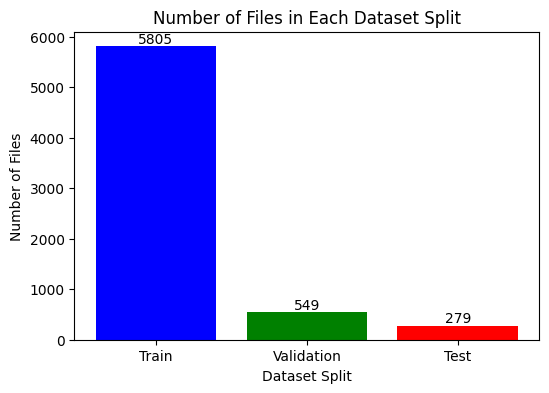

In [11]:
import os
import matplotlib.pyplot as plt

# Function to count the number of files in a directory
def count_files(directory):
    """
    Count files in the given directory.

    :param directory: directory to analyse
    :return: number of files in the given directory
    """
    count = 0
    for filename in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, filename)):
            count += 1
    return count

# Count images in each folder
train_count = count_files("/content/data/train/images")
valid_count = count_files("/content/data/valid/images")
test_count = count_files("/content/data/test/images")

# Data
categories = ["Train", "Validation", "Test"]
file_counts = [train_count, valid_count, test_count]  # Example values, replace with actual counts if needed

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(categories, file_counts, color=["blue", "green", "red"])

# Add labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             str(int(bar.get_height())), ha="center", va="bottom", fontsize=10)

plt.xlabel("Dataset Split")
plt.ylabel("Number of Files")
plt.title("Number of Files in Each Dataset Split")
plt.show()

## Bounding box count analysis

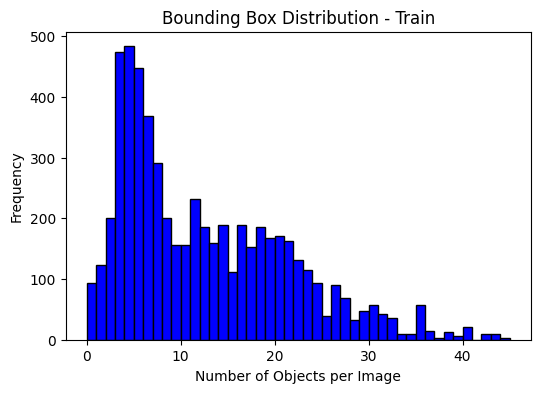

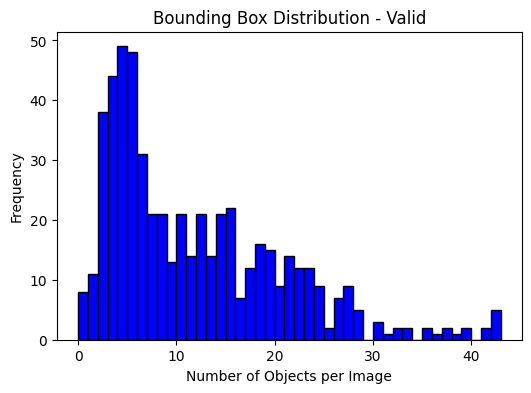

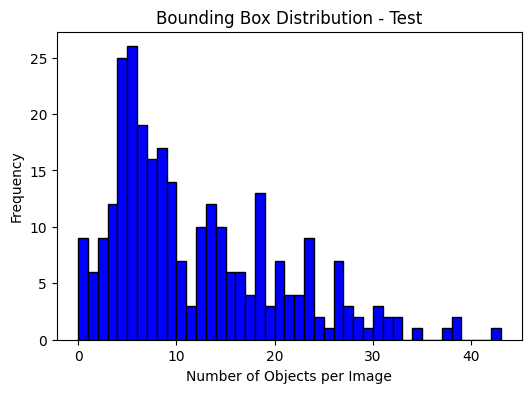

In [14]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Function to count bounding boxes in label files
def count_bounding_boxes(label_dir):
    """
    Count the number of bounding boxes per image and overall class distribution.

    :param label_dir: Directory containing YOLO label files
    :return: List of bounding box counts per image, class frequency dictionary
    """
    bbox_counts = []
    class_counts = {}

    for label_file in os.listdir(label_dir):
        if label_file.endswith(".txt"):
            with open(os.path.join(label_dir, label_file), "r") as file:
                lines = file.readlines()
                bbox_counts.append(len(lines))  # Number of objects in the image

                for line in lines:
                    class_id = int(line.split()[0])  # Extract class ID
                    class_counts[class_id] = class_counts.get(class_id, 0) + 1

    return bbox_counts, class_counts


# Define dataset splits
splits = ["train", "valid", "test"]

for split in splits:
    label_dir = f"/content/data/{split}/labels"
    image_dir = f"/content/data/{split}/images"

    bbox_counts, class_counts = count_bounding_boxes(label_dir)

    plt.figure(figsize=(6, 4))
    plt.hist(bbox_counts, bins=range(0, max(bbox_counts) + 1), color="blue", edgecolor="black")
    plt.xlabel("Number of Objects per Image")
    plt.ylabel("Frequency")
    plt.title(f"Bounding Box Distribution - {split.capitalize()}")
    plt.show()



## Class distribution analysis

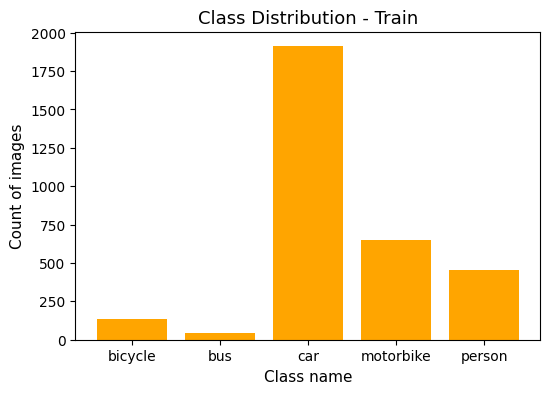

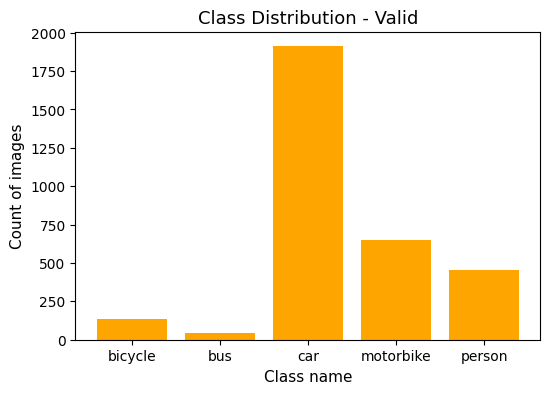

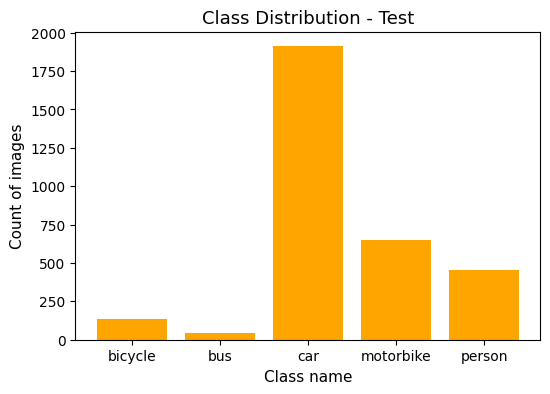

In [31]:
classes = ['bicycle', 'bus', 'car', 'motorbike', 'person']

for split in splits:
    label_dir = f"/content/data/{split}/labels"
    image_dir = f"/content/data/{split}/images"

    # 2. Class distribution analysis
    plt.figure(figsize=(6, 4))
    plt.bar(class_counts.keys(), class_counts.values(), color="orange")
    plt.xlabel("Class name", fontsize=11)
    plt.ylabel("Count of images", fontsize=11)

    plt.title(f"Class Distribution - {split.capitalize()}", fontsize=13)

    # Map class IDs to class names for x-axis labels
    class_labels = [classes[cid] if cid < len(classes) else f"Class {cid}" for cid in class_counts.keys()]
    plt.xticks(list(class_counts.keys()), class_labels)

    plt.show()

## Image size visualization

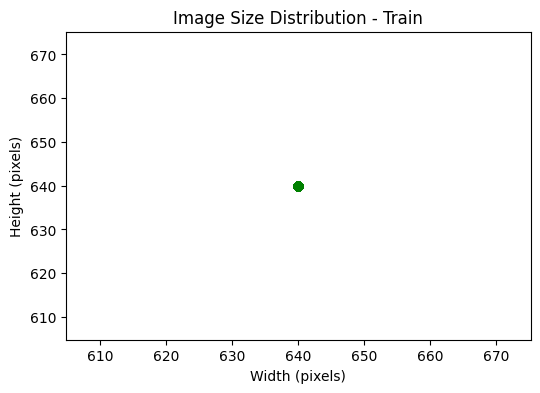

width: {640}
height: {640}



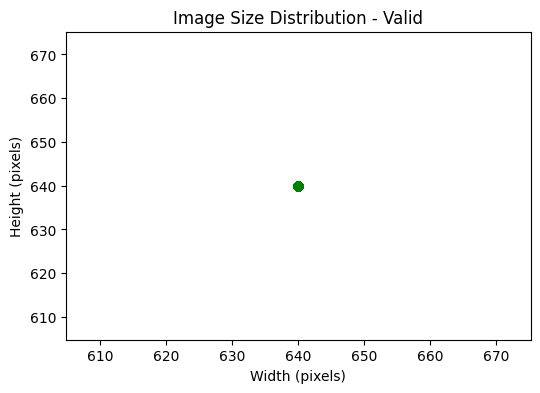

width: {640}
height: {640}



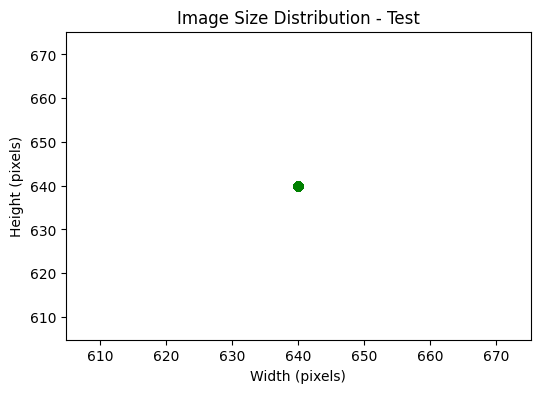

width: {640}
height: {640}



In [22]:
def get_image_sizes(image_dir):
    """
    Get image dimensions (width, height) for visualization.

    :param image_dir: Directory containing images
    :return: List of (width, height) tuples
    """
    image_sizes = []

    for image_file in os.listdir(image_dir):
        if image_file.endswith((".jpg", ".png")):
            image_path = os.path.join(image_dir, image_file)
            image = cv2.imread(image_path)
            if image is not None:
                h, w, _ = image.shape
                image_sizes.append((w, h))

    return image_sizes

for split in splits:
    label_dir = f"/content/data/{split}/labels"
    image_dir = f"/content/data/{split}/images"

    image_sizes = get_image_sizes(image_dir)
    widths, heights = zip(*image_sizes) if image_sizes else ([], [])

    plt.figure(figsize=(6, 4))
    plt.scatter(widths, heights, alpha=0.5, color="green")
    plt.xlabel("Width (pixels)")
    plt.ylabel("Height (pixels)")
    plt.title(f"Image Size Distribution - {split.capitalize()}")
    plt.show()

    print(f"\nSplit: {split}")
    print(f"width: {set(widths)}px")
    print(f"height: {set(heights)}px")
    print()